## NLP Pipeline

In the previous chapter , we saw examples of some common NLP applications that we might encounter in everyday life . If we were asked to build such an application , think about how we would approach doing so at our organization . We would normally walk through the requirements and break the problem down into several sub-problems , then we try to develop a step-by-step procedure to solve them , we would also list all the forms of text processing needed at each step . This step-by-step processing of text is known as a pipeline . It is the series of steps involved in building any NLP model . These steps are common in every NLP project , so it makes sense to study them in this chapter . In later chapters , we'll discuss specific pipelines for various NLP tasks . 

The key stages in the pipeline are as follows : 

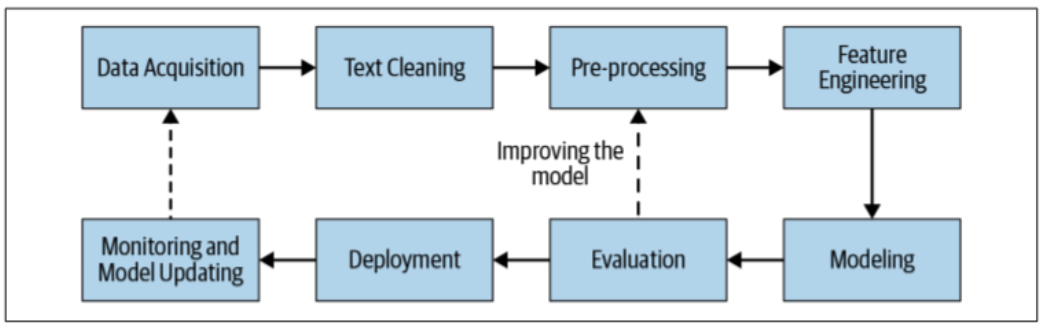

The first step in the process of developing any NLP system is to collect data relevant to the given task . Even if we're building a rule-based system , we still need some data to design and test our rules . The data we get is seldom clean , and this is where text cleaning comes into play . After cleaning , text data often has a lot of variations and needs to be converted into a canonical form . This is done in the pre-processing step . This is followed by feature engineering , where we carve out indicators are converted into a format that is understandable by modeling algorithms . Then comes the modeling and evaluation phase , where we build one or more models and compare and constract them using a relevant evaluation metric(s) . Once the best model among the ones evaluated is chosen , we move toward deploying this model in production . Finally , we regularly monitor the performance of the model and , if need be , update it to keep up it's performance . 

Note that exact step-by-step procedures map depend on the specific task at hand . For example , a text-classification system may require a different feature extraction step compared to a text-summarization .

For the rest of this chapter , we'll look at the individual stages of the pipeline in detail along with examples . We'll describe some of the most common procedures at each stage and discuss some use cases to illustrate them . Let's start with the first step : data acquisition .

### 1 - Data Acquisition 

Data is the heart of any ML system . In the most industrial projects , it is often the data that becomes the bottleneck . In this section we'll discuss various strategies for gathering relevant data for an NLP project . So , how can we get such data ?

**Use a public dataset :** We could see if there are any public datasets available that we can leverage . Take a look at the compiltion by Nicolas Iderhoff or search Google's specialized search engine for datasets . If you find suitable dataset that's similar to the task at hand , great! Build a model and evaluate . If not , then what ?

**Scrape data :** We could find a source of relevant data on the internet . Scrape the data from there and get it labeled by human annotators . 

For many industrial settings , gathering data from external sources does not suffice because the data doesn't contain nuances like product names or product specific user behavior and thus might be very different from the data seen in production environments . This is when we'll have to start looking for data inside the organization . 

**Product intervention :** is ofter the best way to collect data for building intelligent applications in industrial settings . Tech giants like Google , Facebook , Microsoft , Netflix , etc., have known this for a long time and have tried to collect as much data as possible from as many users as possible .

**Data augmentation :** While instrumenting products is a great way to collect data , it takes time . Even if you instrument the product today , it can take anywhere between three to six months to collect a decent-sized, comprehensive dataset . So , can we do something in the meantime ?

NLP has a bunch of techniques through which we can take a small dataset and use some tricks to create more data . These tricks are also called data augmentation , and they try to exploit language propreties to create text that is syntactically similar to source text data . They may appear as hacks , but they work very well in practice . Let's look at some of them :

   - **Synonym replacement :** Randomly choose "k" words in a sentence that are not stop words . Replace these words with their synonyms . For synonyms , we can use Synsets in Wordnet .
     
   - **Back translation :** Say we have a sentence , S1 , in English . We use a machine-translation library like Google Translate to translate it into some other language - say, German . Let the corresponding sentence in German be S2 . Now , we'll use the machine-translation library again to translate back to english. Let the output sentence be S3 . We'll find that S1 and S3 are very similar in meaning but are slight variations of each other . Now we can addd S3 to our dataset . This trick works beautifully for text classification . 
   
   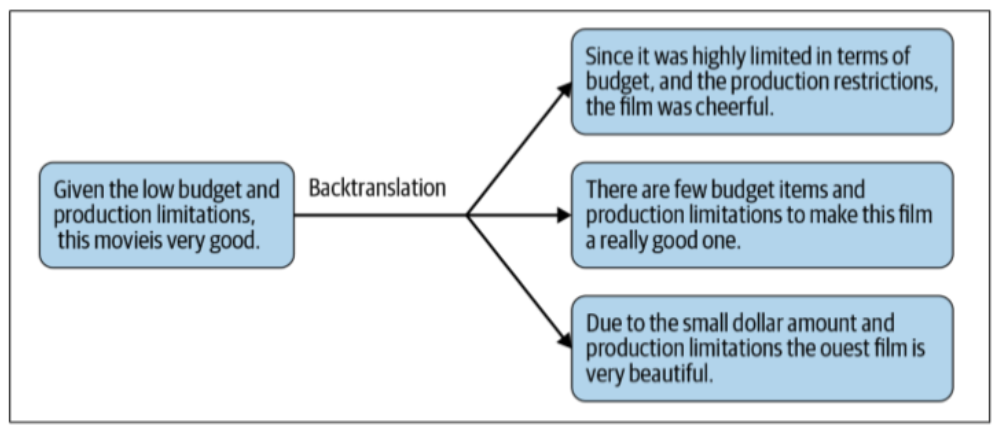
   
   - **TF-IDF-based word replacement :** Back translation can lose certain words that are crucial to the sentence . So , we can use TF-IDF to handle this . 
   
   - **Bigram flipping :** Divide the sentence into bigrams . Take one bigram at random and flip it. For example : "I am going to the supermarket." Here , we take the bigram "going to" and replace it with the flipped one : "to going".
   
   - **Replacing entities :** Replace entities like person name , location , organizations , etc., with other entities in the same category . That is , replace person name with another person name , city with another city , etc.
   
   - **Adding noise to data :** In many NLP applications , the incoming data contains spelling mistakes . This is primarily due to characteristics of the platform where the data is being generated (for example , Twitter) . In such cases , we can add a bit of noise to data to train robust models. For example, randomly choose a word in a sentence and replace it with another word that's closer in spelling to the first word . Another source of noise is the "fat finger" problem on mobile keyboards . Simulate a QWERTY keyboard error by replacing a few characters with their neighboring characters on the QWERTY keyboard . 
   
**Advanced techniques :** There are other advanced techniques and systems that can augment text data . Some of the notable ones are : 

   - **Snorkel :** This is a system for building training data automatically , without manual labeling , Using Snorkel , a large training dataset can be "created" - without manual labeling - using heuristics and creating synthetic data by transforming existing data and creating new data samples .
   
   - **Easy Data Augmentation (EDA) and NLPAug :** These two libraries are used to create synthetic samples for NLP . They provide implementation of various data augmentation techniques , including some techniques that we discussed previously . 
   
   - **Active learning :** This is a specialized paradigm of ML where the learning algorithm can interactively query a data point and get it's labed . It is used in scenarios where there is an abundance of unlabeled data but manually labeling is expensive . In such cases , the question becomes : for which data points should we ask for labels to maximize learning while keeping the labeling cost low ? 
   
   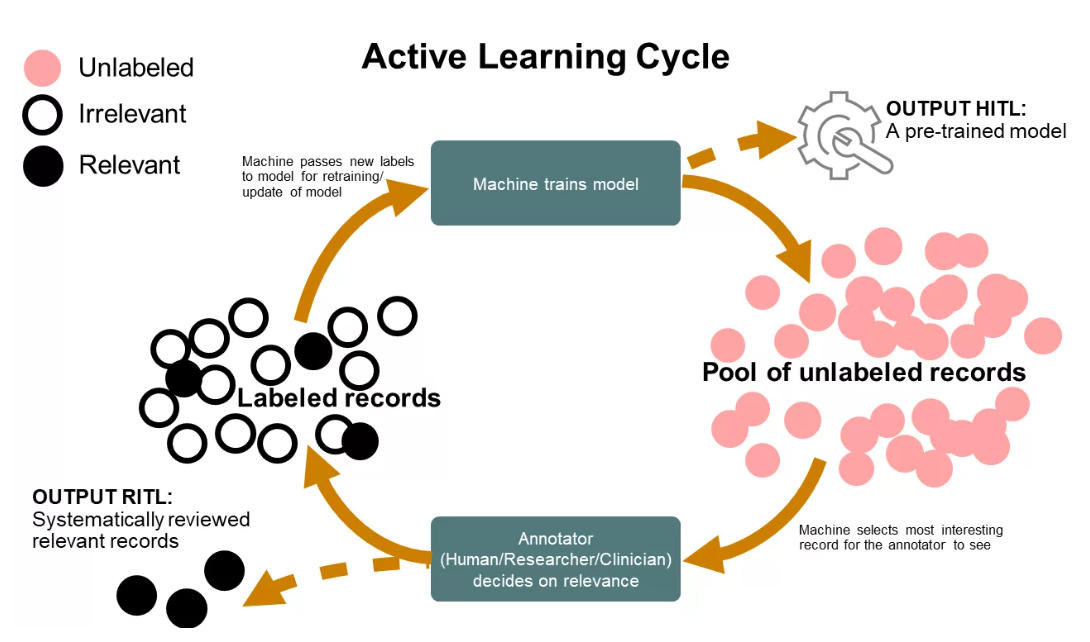
   
In order for most techniques we discussed in this section to work well , one key requirement is a clean dataset to start with , even if it's not very big . So , once we have data we want for a given task , we proceed to the next step : text cleaning .   

### 2 - Text Extraction and Cleanup 

Text extraction and cleanup refers to the process of extracting raw text from the input data by removing all the other non-textual information , such as markup , metadata , etc., and converting the text to the required encoding format . Typically , this depends on the format of available data in the organization (e.g., static data from pdf , HTML or text , some continuous data stream , etc.).

**HTML Parsing and Cleanup :** Say we're working on a project where we're buildind a forum search engine for programming questions . We've identified Stack Overflow as a source and decided to extract question and best-answer pairs from the website . How can we go through the text-extraction step in this case ? If we observe the HTML markup of a typical Stack Overflow question page, we notice that questions and answers have special tags associated with them . We can utilize this information while extracting text from the HTML page. While it may seem like writing our own HTML parser in the way to go, for most cases we encounter , it's more feasible to utilize existing libraries such as Beautiful Soup and Scrapy , which provide a range of utilities to parse web pages . 

**Unicode Normalization :** As we develop code for cleaning up HTML tags , we may also counter various Unicode characters , including symbols , and other graphic characters .

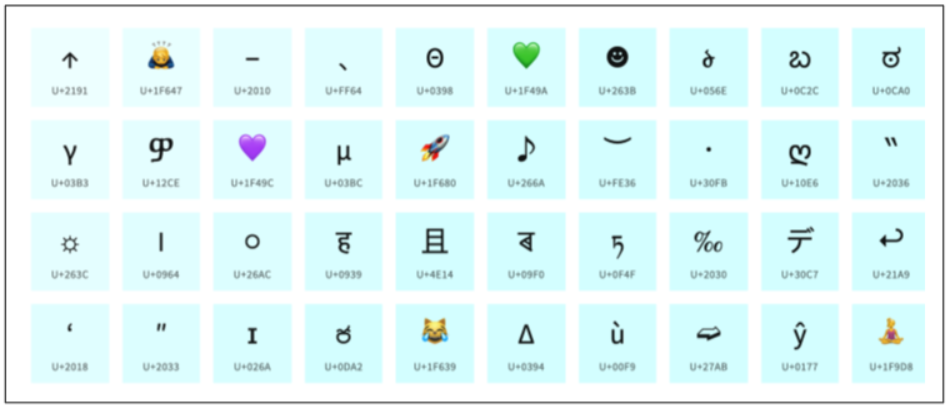

To parse such non-textual symbols and special characters , we use Unicode normalization . This means that the text we see should be converted into some form of binary representation to store in a computer . This process in known as text encoding . Ignoring encoding issues can result in processing errors futher in the pipeline . 

**Spelling Correction :** In the world of fast typing and fat-finger typing , incoming text data often has spelling errors . This can be prevalent in search engines , text-based chatbots deployed on mobile devices , social media , and many other sources . While we remove HTML tags and handle Unicode characters , this remains a unique problem that may hurt the linguistic understanding of the data , and shorthand text messages in social micro-blogs often hinder language processing and context understanding . While shorthand typing is prevalent in chat interfaces , fat-finger problems are common in search engines and are mostly unintentional . Despite our understanding of the problem , we don't have robust method to fix this , but we still can make good attempts to mitigate the issue . Microfost released a REST API that can be used in Python for potential spell checking . Going beyond APIs , we can build our own spell checker using a huge dictionnary of words from a specific language . A native solution would be to look for all words that can be composed with minimal alteration (addition , deletion , substitution ) to it's constituent letters . For example , if "Hello" is a valid word that is already present in the dictionary , then the addition of "o" (minimal) to "Hllo" would make the correction . 

**System-specific Error Correction :** HTML or raw text scraped from the web are just a couple of sources for textual data . Consider another scenario where our dataset is in the form of a collection of PDF documents . The pipeline in this case starts with extraction of plain text from PDF documents . However , different PDF documents are encoded differently , and sometimes , we may not be able to extract the full text , or the structure of the text may get missed up . If we need full text or our text has to be grammatical or in full sentences (e.g., when we want to extract relations between various people in the news based on newspaper text) , this can impact our application . While there are several libraries , such as PyPDF , PDFMiner , etc., to extract text from PDF documents , they are far from perfect , and it's not uncommon to encounter PDF documents that can't be processed by such libraries . 

Another common source of textual data is scanned documents . Text extraction from scanned documents typically done through optical character recognition (OCR) , suing libraries such as Tesseract .

So depending on the quality of the original scan , OCR output can potentially have larger amounts of errors . How do we clean up this text before feeding it into the next stage of the pipeline ? One approach is to run the text through a spell checker such as pyenchant , which will identify misspellings ans suggest some alternatives . More recent approaches use neural network architecrutes to train word/character-based language models, which are in turn used for correcting OCR text output based on the context .

Recall that we saw an example of a voice-based assistant . In such cases , the source of text extraction is the output of an automatic speech recognition (ASR) system . Like OCR,it's common to see some errors in ASR , owing to various factors , such a dialectical variations , slang , non-native English , new or domain-specific vocabulary , etc. The above-mentioned approach of spell checkers or neural language models can be followed here as well to clean up the extracted text . 

What we've seen so far are just some examples of potential issues that may come up during the text-extraction and cleaning process . Though NLP plays a very small role in this process , we hope these examples illustrate how text extraction and cleanup could pose challenges in a typical NLP pipeline . We'll also touch on these aspects in upcoming chapters for different NLP applications , where relevant . Let's move to the next step in our pipeline : Pre-processing . 

### 3 - Pre-processing 

Let's start with a simple quetion : we already did some cleanup in the previous step; why do we still have to pre-process text ? Consider a scenario where we're processing text from wikipedia pages about individuals to extract biographical information about them . Our data acquisition starts with crawling such pages . However , our crawled data is all in HTML , with a lot of boilerplate from wikipedia (e.g., all the links in the left panel),possibly the presence of links to multiple languages (in their script),etc. All such information is irrelevant for extracting features from text (in most cases).Our text-extraction step removed all this and gave us the plain text of the article we need . However, all NLP software typically works at the sentence level and expects a separation of words at the minimum . So,we need some way to split a text into words and sentences before proceeding further in a processing pipeline . Sometimes , we need to remove special characters and digits , and sometimes , we don't care whether a word is in upper or lowercase and want everything is lowercase . Many more decisions like this are made while processing text . Such decisions are adressed during the pre-processing step of the pipeline . Here are some common pre-processing steps used in NLP software : 

1 - Preliminaires : Sentence segmentation and word tokenization 

2 - Frequent steps : Stop word removal , stemming and lemmatization , removing digits/punctuation , lowercasing,etc.

3 - Other steps : Normalization , language detection , code mixing , transliteration ,etc.

4 - Advanced processing : POS tagging , parsing , coreference resolution ,etc.

While not all steps will be followed in all the NLP pipelines we encounter , the first two are more or less seen everywhere . Let's take a look at what each of these steps mean . 

**1 - Preliminaires :**

As mentioned earlier , NLP software typically analyzes text by breaking it into words (tokens) and sentences . Hence , any NLP pipeline has to start with a reliable system to split the text into sentences (sentence segmentation) and further split a sentence into words (word tokenization).On the surface , these seem like simple tasks , and you may wonder why they need special treatment . We will see why in the coming two subsections . 

  - **Sentence segmentation :** 
  
 As a simple rule , we can do sentence segmentation by breaking up text into sentences at the appearance of full stops and question marks . However , there may be abbreviations , forms of addresses (Dr.,Mr., etc.), or ellipses (...) that may break the simple rule.
 
 Thankfully , we don't have to worry about how to solve these issues , as as most NLP libraries come with some form of sentence and word splitting implemented . A commonly used library in Natural Language Tool Kit (NLTK) . 
 
  - **Word tokenization :**

 Similar to sentence tokenization , to tokenize a sentence into words , we can start with a simple rule to split text into words based on the presence of punctuation marks. The NLTK library allows us to do that . 
 
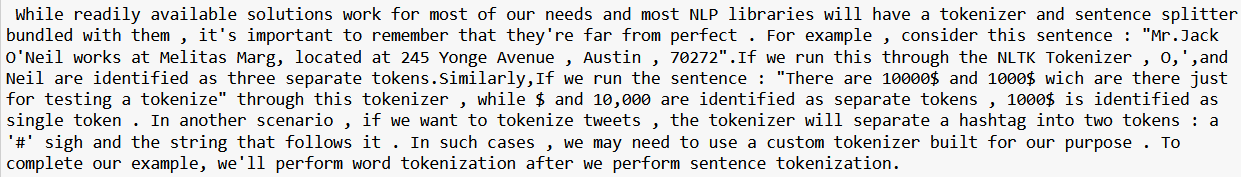

 A point to note in this context is that NLTK also has a tweet tokenizer . To summarize , although word- and sentence- tokenization approaches appear to be elementary and easy to implement, they may not always meet our specific tokenization needs , as we saw in the above examples . Note that we refer to NLTK's example, but these observations hold true for any other library as well . 
 
 As tokenization may differ from one domain to the other, tokenization is also heavily dependent on language . Each language can have various linguistic rules and exceptions . Example where "N.Y.!" has a total of three punctuations.But in English , N.Y. stands for New York , hence 'N.Y.' should be treated as a single word and not be tokenized further. Such language-specific exceptions can be specified in the tokenizer provided by SpaCy . It's also possible in SpaCy to develop custom rules to handle sych exceptions for languages that have high inflections (prefixes or suffixes ) and complex morphology . 
 
 For identifying specific patterns (e.g., dates or money expressions),well-formed regular expressions are the first step.In many practical scenarios , we may end up using custom tokenizer or sentence segmenter that suits our text structure instead of or on top of an existing one available in a standard NLP library.
 
 **2 - Frequent Steps :** 
 
 Let's look atsome other frequently performed pre-processing operations in an NLP pipeline . Say we're designing software that identifies the category of a news article as one of politics , sports , business , and other . Assume we have a good sentence segmenter and word tokenize in place . At that point , we would have to start thinking about what kind of information is useful for developing a categorization tool.Some of the frequently used words in English,such as a , an , the , of , in , etc., are not particularly useful for this task,as they don't carry any content on their own to separate between the four categories . Such Words are called stop words and are typically (though not always) removed from further analysis in such problem scenarios . There is no standard list of stop words for English , though . There are some popular lists (NLTK has one ,for example) , although what a stop word is can vary depending on what we're working on.For example , the word "news" is perhaps a stop word for this problem scenario, but it may not be a stop word for the offre letter data in the example mentioned in the previous step.
 
 Similarly , in some xases , upper or lowercase may not make a difference for the problem . So,all text is lowercased (or uppercased , although lowercasing is more common).Removing punctuation and/or numbers is also a common step for many NLP problems , such as text classification , information retrieval and social media analytics .
 
 It's important to note that these four processes are neither mandatory nor sequential in nature . The pre-processing we saw here,while specific to textual data,has nothing particularly linguistic about it - we're not looking at any aspect of language other than frequency (stop words are very frequent words) , and we're removing non-alphabetic data (punctuation , digits).Two commonly used pre-processing steps that take the word-level propreties into account are stemming and lemmatization.
 
 - **Stemming and lemmatization:**
 
 Stemming refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., "car" and "cars" are both reduced to "car").This is accomplished by applying a fixed set of rules (e.g., if the word ends in "-es" remove "-es") . Although such rules may not always end up in a linguistically correct base form , stemming is commonly used in search engines to match user queries to relevant documents and in text classification to reduce the feature space to train machine learning models . 
 
 Lemmatization is the process of mapping all the different forms of a word to it's base word , or lemma. While this seems close to the definition of stemming , they are, in fact , different. For example , the adjective "better" , when stemmed , remains the same . However , upon lemmatization , this should become "good" . Lemmatization requires more linguistic knowledge , and modeling and developing efficient lemmatizers remains an open problem in NLP research even now . 
 
 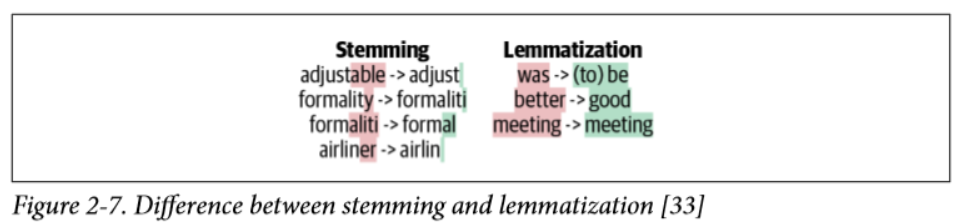
 
NLTK prints the output as 'good' , whereas spaCy prints 'well' - both are correct . Since lemmatization involves some amount of linguistic analysis of the word and it's context , it is expected that it will take longer to run than stemming , and it's also typically used only if absolutely necessary . we'll see how stemming and lemmatization are useful in the next chapters . The choice of lemmatizer is optinal , we can choose NLTK or spaCy given what framework we're using for other pre-processing steps in order to use a single framework in the complete pipeline .

Remember that not all of these steps are always necessary , and not all of them are performed in the order in which they're discussed here . For example , if we were to remove digits or punctuation , what is removed first may not matter much.However,we typically lowercase the text before stemming . We also don't remove tokens or speech of the word to get it's lemma , and that requires all tokens in the sentence to be intact. A good practice to follow is to prepare a sequential list of pre-processing tasks to be done after having a clear understanding of how to process our data . 

Note that these are the more common pre-processing steps , but they're by no means exhaustive . Depending on the nature of the data , some additional pre-processing steps may be important . Let's take a look at a few of those steps : 

 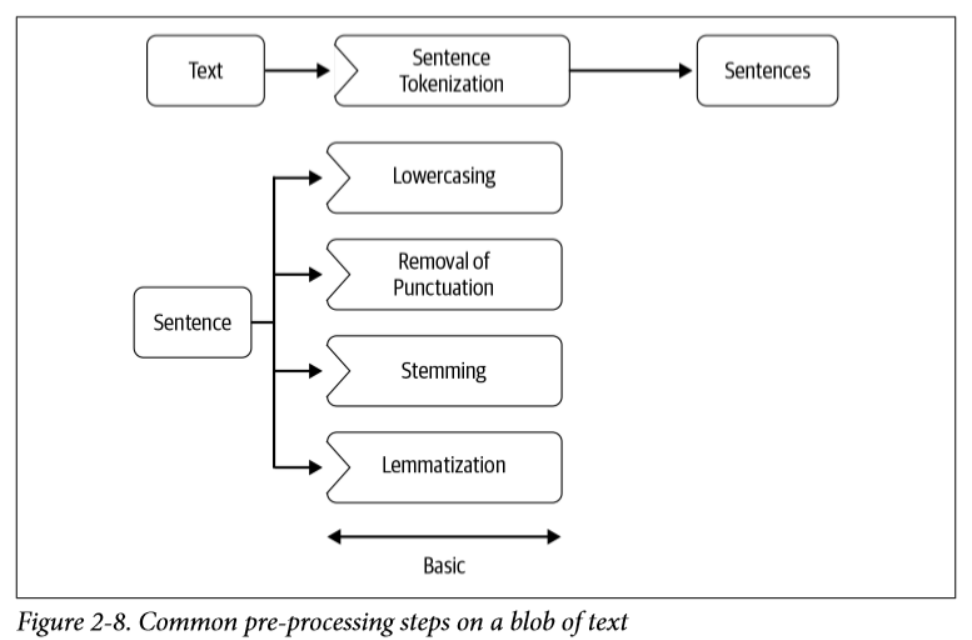
 
  **3 - Other Pre-Processing Steps :** 
  
  So far , we've seen a few common pre-processing steps in an NLP pipeline . While we haven't explicitly stated the nature of the texts , we have assumed that we've dealing with regular English text.What's different if that's not the case ? Let's introduce a few more pre-processing steps to deal with such scenarios . 
  
  - **Text normalization:**
  
  Consider a scenario where we're working with a collection of social media posts to detect news events . Social media text is very different form of language we'd see in , say , newspapers . A word can be spelled in different ways, including in shortend forms, a phone number can be written in different formats , names are sometimes in lowercase , and so on. When we're working on developing NLP tools to work with such data , it's useful to reach a canonical representation of text that captures all these variations into one representation . This is known as text normalization . Some common steps for text normalization are to convert all text to lowercase or uppercase , convert digits to text , expand abbreviations , and so on.
  
  - **Language detection:**
  
  A lot of web content is non-english languages . For example , say we're asked to collect all reviews about our product on the web . As we navigate different e-commerce websites and start crawling pages related to our product , we notice several non-English reviews showing up . Since a mojority of the pipeline is built with language specific tools , what will happen to our NLP pipeline , which is expecting English text ? In such cases , language detection is performed as the first step in an NLP pipeline . We can use libraries like Polyglot for language detection . One this step is done the next steps could follow a language-specific pipeline . 
  
  - **Code mixing and transliteration:**
  
  The discussion above was about a scenario where the content is in non-English languages . However , there's another scenario where a single piece of content is in more than one language . Many people across the across the world speak more than one language in their day-to-day lives . Thus , it's not uncommon to seethem using multiple languages in their social media posts , we can look at a Singlish (Singapore slang + English) phrase from LDC . 
  
  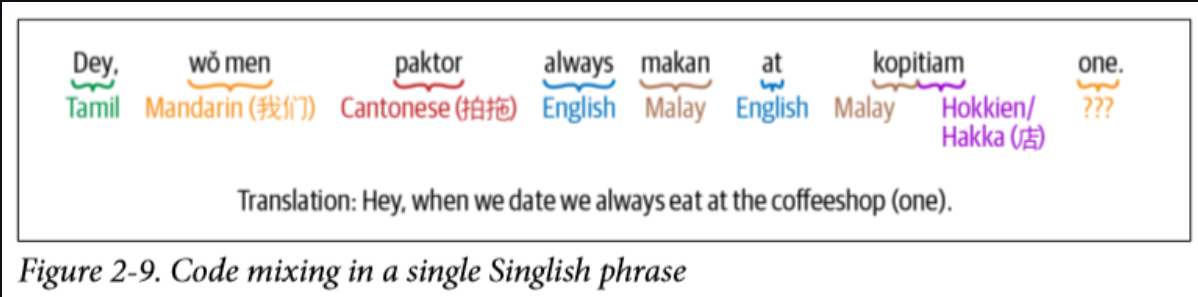
  
  A single popular phrase has words from Tamil , English , Malay , and three Chinese language variants . Code mixing refers to this phenomenon of switching between languages . When people use multiple languages in their write-ups , they often types words from these languages in Roman script , with English spelling . So, the words of another language are written along with English text . This is known as transliteration . Both of these phenomena are common in multilingual communities and need to be handled during the pre-processing of text . 
  
  This concludes our discussion of common pre-processing steps . While this list is by no means exhaustive , we hope it gives you some idea of the different forms of pre-processing that may be required , depending on the nature of the dataset . Now , let's take a look at a few more pre-processing steps in the NLP pipeline-ones that need advanced language processing beyong what we've seen so far . 
  
  **4- Advanced Processing :** 
  
  Imagine we're asked to develop a system to identify person and organization names in our company's collection of one million documents . The common pre-processing steps we discussed earlier may not be relevant in this context . identifying names requires us to be able to do some POS tagging , as identifying proper nouns can be useful in identifying person and organization names.How do we do POS tagging during the pre-processing stage of the project ? We're not going into details oh how POS taggers are developed in this book . Pre-trained and readily usable POS taggers are implemented in NLP libraries such as NLTK , Spacy , and Parsey McParseface Tagger , and we generally don't have to develop our own POS-tagging solutions . The following code snippet illustrates how to use many of the pre-built pre-processing functions we've discussed so far using the NLP library spaCy :
 

In [3]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Charles Spencer Chaplin was born on 16 April 1889 to Hannah Chaplin (born Hannah Harriet Pedlingham Hill) and Charles Chaplin Sr')

for token in doc:
    print(token.text,token.lemma_,token.pos_,token.shape_,token.is_alpha,token.is_stop)

Charles Charles PROPN Xxxxx True False
Spencer Spencer PROPN Xxxxx True False
Chaplin Chaplin PROPN Xxxxx True False
was be AUX xxx True True
born bear VERB xxxx True False
on on ADP xx True True
16 16 NUM dd False False
April April PROPN Xxxxx True False
1889 1889 NUM dddd False False
to to ADP xx True True
Hannah Hannah PROPN Xxxxx True False
Chaplin Chaplin PROPN Xxxxx True False
( ( PUNCT ( False False
born bear VERB xxxx True False
Hannah Hannah PROPN Xxxxx True False
Harriet Harriet PROPN Xxxxx True False
Pedlingham Pedlingham PROPN Xxxxx True False
Hill Hill PROPN Xxxx True False
) ) PUNCT ) False False
and and CCONJ xxx True True
Charles Charles PROPN Xxxxx True False
Chaplin Chaplin PROPN Xxxxx True False
Sr Sr PROPN Xx True False


In this simple snippet , we can see tokenization , lemmatization , POS tagging , and several other steps in action ! Note that if needed we can add additional processing steps with the same code snippet . A point to note that there may be differences in the output among different NLP libraries for the same pre-processing step . This is due in part to implementation differences and algorithmic variations among different libraries . Which library (or libraries) you'll eventually want to use in your project is a subjective decision based on the amount language processing you want .

Let's now consider a slightly different problem : along with identifying person and organization names in our company's collection of one million documents , we're also asked to identify if a given person and organization are related to each other in some way (e.g., Satya Nadella is related to Microsoft through , the relation CEO ) . This is known as the problem of relation extraction . But for now , think about what kind of pre-processing we need for for this case . We need POS tagging , which we already know know how to add to our pipeline . We need a way of identifying person and organization names , which is a separate information extraction task known as named entity recognition (NER) . Apart these two , we need a way to identify patterns indicating "relation" between two entities in a sentence . This requires us to have some form syntactic representation of the sentence , such as parsing . Further , we also want a way to identify and link multiple mentions of an entity (e.g, Satya Nadella , Mr. Nadella , he , etc.). We accomplish this with the pre-processing step known as coreference resolution.

What we've seen so far in this section are some of the most common pre-processing steps in a pipeline . They're all available as pre-trained , usable models in different NLP libraries . Apart from these , additional , customized pre-processing may be necessary depending on the application . For example , consider a case where we're asked to mine the social media sentiment on our product . We start by collecting data from , say , Twitter and quickly realize there are tweets that are not in English . In such cases we may also need a language-detection step before doing anything else.

Additionally, what steps we need also depends on a specific application . If we're creating a system to identify whether the reviewer is expressing a positive or negative sentiment about a movie from a review they wrote , we might not worry much about parsing or coreference resolution , but we would want to consider stop word removal , lowercasing , and removing digits . However , if we're interested instead in extracting calendar events from emails , we'll probably be better off not remiving stop words or doing stemming , but rather including , say , parsing . In the case where we want to extract relationships between different entities in the text and events mentioned in it, we would need coreference resolution, as we discussed previously.

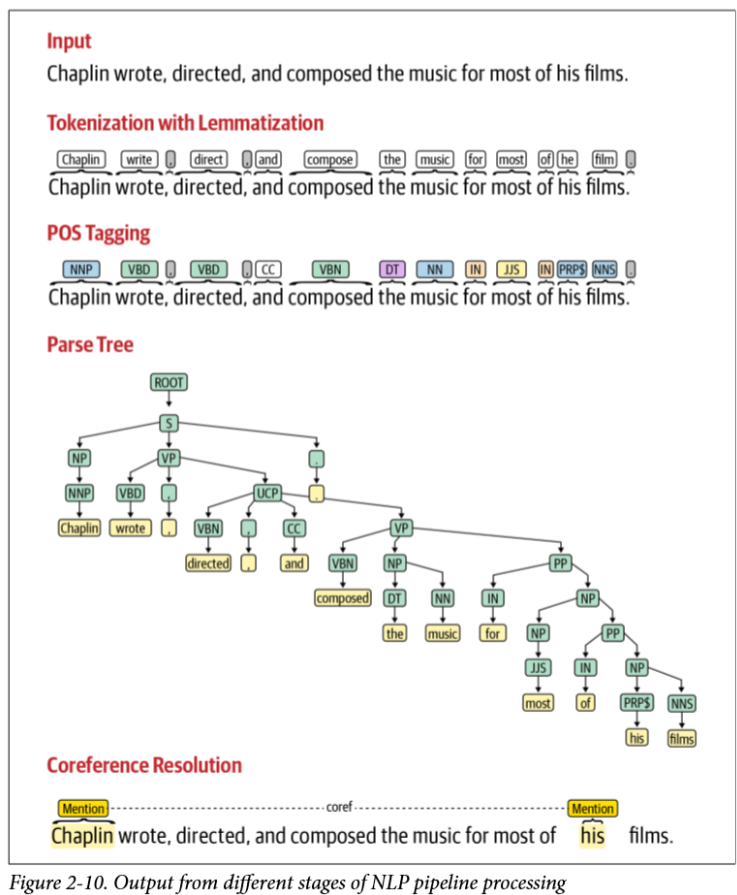

Finally , we have to consider the step-by-step procedures of pre-processing in each case , as summarized in the figure . 

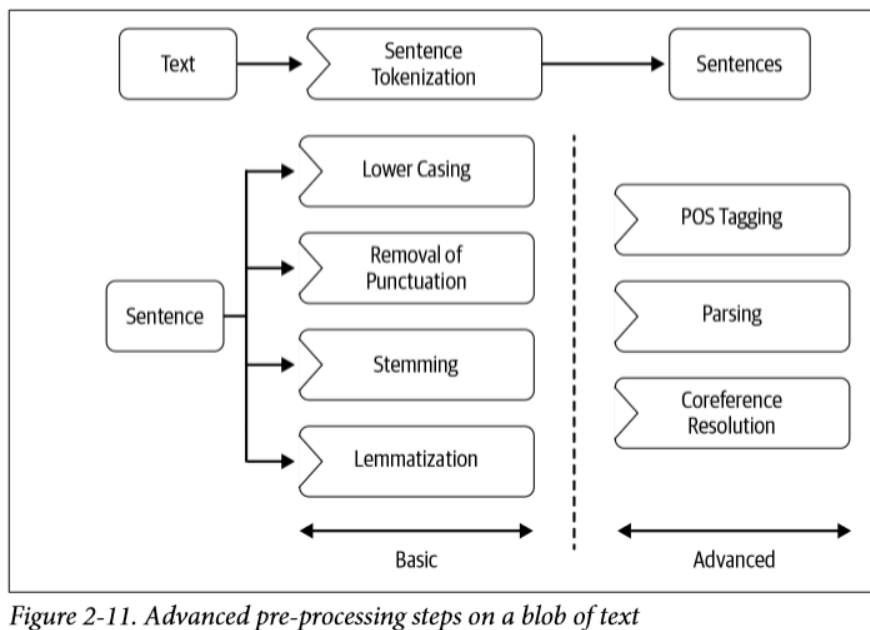

For example POS tagging cannot be preceded by stop words removal , lowercasing , etc ., as such processing affects POS tagger output by changing the grammatical structure of the sentence . How a particular pre-processing step is helping a given NLP problem is another question that is specific to the application . We'll discuss more specific pre-processing required for different NLP applications . For now , let's move on to the next step : feature engineering . 

### 4 - Feature engineering

So far , we've seen different pre-processing steps and where they can be useful . When we use ML methods to perform our modeling step later , we'll still need a way to feed this pre-processed text into an ML algorithm . Feature engineering refers to the set of methods that will accomplish this task . It's also referred to as feature extraction . The goal of feature engineering is to capture the characteristics of the text into a numeric vector that can be understood by the ML algorithms . We refer to this step as "text representation" in this book, and it's the topic of Chapter 3 . Here , we'll briefly touch on two different approaches taken in practice for feature engineering in (1) a classical NLP and traditional ML pipeline and (2) a DL pipeline.

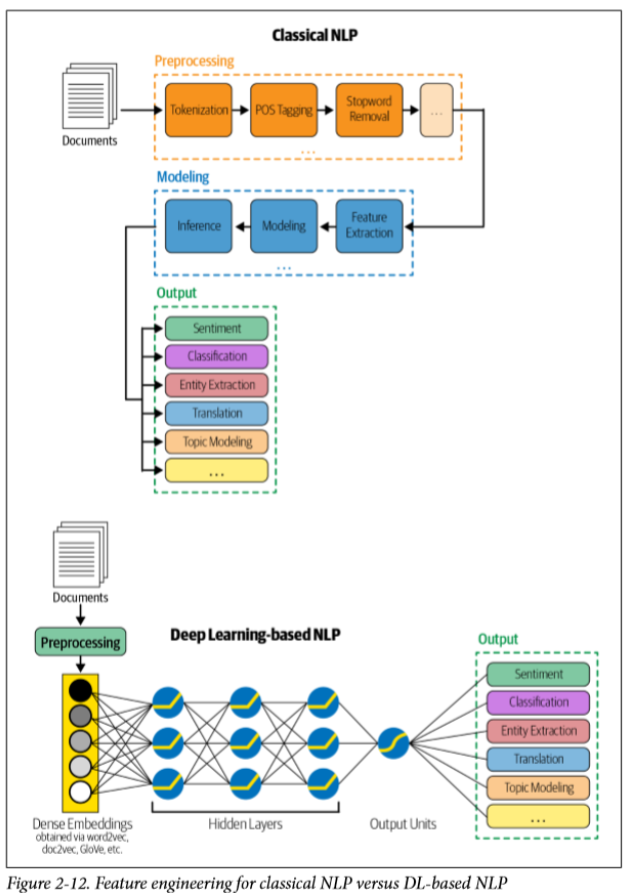

**- Classical  NLP/ML pipeline :** 

Feature engineering in an integral step in any ML pipeline . Feature engineering steps convert the raw data into a format that can be consumed by a machine . These transformation functions are usually handcrafted in the classical ML pipeline , aligning to  the task at hand . For example , imagine a task of sentiment classification on product reviews into meaningful "numbers" that helps predict the reviews sentiments (positive or negative) would be to count the number of positive and negative words in each review . There are stastical measures for understanding if a feature is useful for a task or not ; we'll discuss this in chapter 11 . The main takeway for building classical ML models is that the features are heavily inspired by the task at hand as well as domain knowledge (for example , using sentiment words in the review example ) . One of the advantages of handcrafted features is that the model remains interpretable - it's possible to quantify exactly how much each feature is influencing the model prediction . 

**- DL pipeline :** 

The main drawback of classical ML models is the feature engineering . Handcrafted feature engineering becomes a bottleneck for both model performance and the model development cycle . A noisy or unrelated feature can potentially harm the model's performance by adding more randomness to the data . Recently , with the advent of DL models , this approach has changed . In the DL pipeline , the raw data (after pre-processing) is directly fed to a model . The model is capable of "learning" features generally give improved performance . But , since all these features are learned via model parameters , the model loses interpretability . It's very hard to explain a DL model's prediction , which is a disadvantage in a business-driven use case.For example when identifying an email as ham or spam , it might be worth knowing which word or phrases played the significant role in making the email ham or spam . While this is easy to do with handcrafted features , it's not easy in the case of DL models .

As we've already mentioned , feature engineering is heavily task specific , so we discuss it throughout the book in the context of textual data and a range of tasks . With a high-level understanding of feature engineering , now let's take a look at the next step in the pipeline , which we call modeling .

### 5 - Modeling

We now have some amount of data related to our NLP project and a clear idea of what sort of cleaning up and pre-processing needs to be done and what features are to be extracted . The next step is about how to build a useful solution out of this . This start , when we have limited data , we can use simpler methods and rules . Over time, with more data and a better understanding of the problem , we can add more complexity and improve performance .

**- Start with Simple Heuristics :** At the very start of building a model , ML may not play a major role by itself . Part of that could be due the lack of data , but human-built heuristics can also provide a great start in some ways . For instance , in email spam-classification tasks , we may have a blacklist of domains that are used exclusively to send spam. This information can be used to filter emails from those domains . Similarly , a blacklist of words in an email that denote a high chance of spam could also be used fot this classification . 

Another popular approach to incorporating heuristics in your system is using regular expressions . Let's say we're developing a system to extract different forms of information from text documents , such as dates and phone numbers , names of people who work in a given organization , etc. While some information , such as email IDs , dates , and telephone numbers can be extracted using normal (albeit complex) regular expressions , Stanford NLP's TokensRegex and spaCy's rule-based matching are two tools that are useful for defining advanced regular expressions to capture other information , such as people who work in a specific organization . 

In the absence of large amounts of training data , and we have some domain knowledge , we can start building systems by encoding this knowledge in the form of rule/heuristics . Even when we're building ML-based models , we can use such heuristics to handle special cases - for example , cases where the model has failed to learn well . Thus , simple heuristics can give us a good starting point and be useful in ML models . Now , assuming we built such a heuristics-based system , where do we go from there ?

**- Building your model :** While a set of simple heuristics is a good start , as our system matures , adding newer and newer heuristics may result in a complex , rule-based system .Such a system is hard to manage , and it can be even harder to diagnose the cause of errors . We need a system that's easier to maintain as it matures . Further , as we collect more data , our ML model starts beating pure heuristics directly ore indirectly with the ML model . There are two broad ways doing that : 

   - **Create a feature from the heuristic for your ML model :** When there are many heuristics where the behavior of a single heuristic is deterministic but their combined behavior is fuzzy in terms of how they predict , it's best to use these heuristics as features to train your ML model . For instance , in the email spam-classification example , we can add features , such as the number of words from the blacklist in a given email or the email bounce rate , to the ML model . 
   
   - **Pre-process your inpout to the ML model :** If the heuristic has a really high prediction for a particular kind of class , then it's best to use it before feeding the data in your ML model. For instance , if for certain words in an email, there's a 99 percent chance that it's spam , then it's best to classify that email as spam instead of sending it to the ML model .
   
**- Building the model :** We've seen examples of getting started building an NLP system by using heuristics or existing APIs , or by building our own ML models .We start with a beseline approach and work toward improving it . We may have to do many iterations of the model building process to 'build the model' that gives good performance and is also production-ready . We cover some approaches to address this issue here :
   
   - **Ensemble and stacking :** 
   
   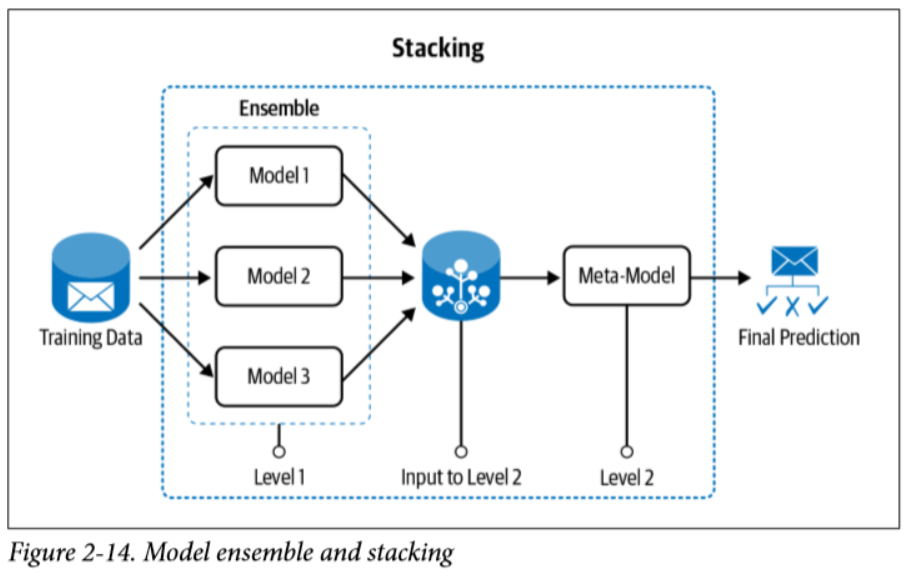
   
   - **Better feature engineering :** For both API-based and custom-built models,feature engineering is an important step , and it evolves throughout the process . A better feature engineering step may lead to better performance . For instance , if there are a lot of features , then we use feature selection to find a better model .
   
   - **Transfer learning :** Apart from model stacking or ensemble , there is a newer trend that's becoming popular in the NLP community - Transfer learning . Often , the model needs external knowledge beyond the dataset for the task to understand the language and the problem well . Transfer learning tries to transfer preexisting knowledge from a big , well-trained model to a newer model at it's initial phase . Afterward , thenew model slowly adapts to the task at hand . As an example , for email spam classification , we can use BERT to fine tune the email dataset . 
   
   - **Reapplying heuristics :** No ML model is perfect . Hence , ML models still make mistakes . It's impossible to revisit theses cases again at the end of the model pipeline to find any common pattern in errors and use heuristics to correct them. We can also apply domain speciffic knowleghe that is not automatically captured in the data to refine the model predictions . 

Now let's take a look at the next step in the pipeline evaluation .

### 6 - Evaluation

**- Popular NLP Metrics:**

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **BLEU Score**
- **ROUGE Score**
- **METEOR Score**
- **Perplexity**
- **Word Error Rate (WER)**
- **CIDEr Score**

**- NLP Applications and Use Cases:**

- **Sentiment Analysis**
- **Text Classification**
- **Named Entity Recognition (NER)**
- **Machine Translation**
- **Question Answering**
- **Text Summarization**
- **Topic Modeling**
- **Natural Language Generation**
- **Speech Recognition**
- **Text-to-Speech Synthesis**

### 7 - Post-Modeling Phases

Once our model has been tried and tested , we move on to post-modeling Phase : Deploying , monitoring , and updating the model . 

**- Deployment:**

Deployment is the process of making the NLP model accessible for use in real-world applications. This typically involves integrating the model into a production environment where it can receive input text data and generate meaningful outputs. Some common approaches to deployment include:

   - **API Deployment:** Creating an API (Application Programming Interface) that exposes the NLP model's functionality, allowing other applications or services to interact with it through requests and responses.

   - **Containerization:** Packaging the model, along with its dependencies and any required infrastructure, into a container (e.g., Docker) for easy deployment across different environments.

   - **Serverless Deployment:** Using serverless computing platforms, such as AWS Lambda or Azure Functions, to deploy the model without worrying about server provisioning or management.

   - **On-device Deployment:** Deploying the model directly onto devices, such as mobile phones or edge devices, to enable offline or low-latency NLP capabilities.

**- Monitoring:**

Once the NLP model is deployed, it is crucial to continuously monitor its performance and behavior in the production environment. Monitoring helps detect anomalies, performance degradation, or concept drift, allowing for timely intervention and improvement. Some aspects to monitor include:

   - **Input/Output Analysis:** Monitoring the distribution and quality of incoming text data, as well as analyzing the model's predictions and outputs for accuracy and reliability.

   - **Performance Metrics:** Tracking various metrics like accuracy, precision, recall, F1-score, or custom domain-specific metrics to assess the model's performance over time.

   - **Resource Utilization:** Monitoring resource usage, such as CPU, memory, or network bandwidth, to ensure the deployed model operates efficiently and doesn't cause bottlenecks or instability.

   - **Error Analysis:** Analyzing misclassifications, errors, or unexpected model behavior to identify patterns, uncover biases, or detect areas where the model can be improved.

**- Model Updating:**

NLP models may require periodic updates to stay relevant and effective. Model updating involves retraining or fine-tuning the model using new labeled data or applying transfer learning techniques to adapt the model to specific domains or tasks. Key steps in model updating include:

   - **Data Collection:** Gathering new labeled data or augmenting existing data to improve the model's performance.

   - **Retraining/Fine-tuning:** Using the new data to update the model's parameters and optimize its performance. This may involve retraining the entire model or updating specific components, depending on the available resources and requirements.

   - **Evaluation:** Assessing the updated model's performance through thorough evaluation, including validation and testing, to ensure that the updates have resulted in improved accuracy or other desired metrics.

   - **Version Control:** Maintaining a versioning system to keep track of different iterations of the model and the associated training data, allowing easy rollback or comparison between different versions.

By following these post-modeling phases of deployment, monitoring, and model updating, NLP practitioners can ensure that their models are effectively deployed, continuously monitored, and kept up-to-date for optimal performance in real-world applications.